#🔹 Cell 1: Install Kaleido (for static image export)

In [1]:
!pip install -U kaleido

#🔹Cell 2: Generate Synthetic Exam Registration Data

In [3]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Seed for reproducibility
np.random.seed(42)

# Create synthetic registration data
n = 1000
student_ids = np.random.randint(100000, 999999, size=n)
exam_types = np.random.choice(['SAT', 'PSAT', 'AP'], size=n)
registration_status = np.random.choice(['Success', 'Failed'], size=n, p=[0.85, 0.15])
error_codes = [None if status == 'Success' else random.choice(['ERR01', 'ERR02', 'ERR03']) for status in registration_status]
timestamps = [datetime.now() - timedelta(days=np.random.randint(0, 30)) for _ in range(n)]

df = pd.DataFrame({
    'student_id': student_ids,
    'exam_type': exam_types,
    'registration_status': registration_status,
    'error_code': error_codes,
    'timestamp': timestamps
})

df.head()


,student_id,exam_type,registration_status,error_code,timestamp
0,221958,SAT,Failed,ERR03,2025-05-21 22:20:31.956326
1,771155,SAT,Failed,ERR03,2025-06-08 22:20:31.956352
2,231932,SAT,Success,None,2025-05-24 22:20:31.956360
3,465838,PSAT,Success,None,2025-05-16 22:20:31.956366
4,359178,SAT,Failed,ERR03,2025-06-10 22:20:31.956371


# 🔹 Cell 3: Root Cause Analysis (Simulated SQL)

In [4]:
# Simulate a SQL-style group by to find root causes
error_summary = df[df['registration_status'] == 'Failed'].groupby('error_code').size().reset_index(name='error_count')
error_summary


,error_code,error_count
0,ERR01,37
1,ERR02,47
2,ERR03,50


#🔹 Cell 4: Plot as Static Image for nbviewer

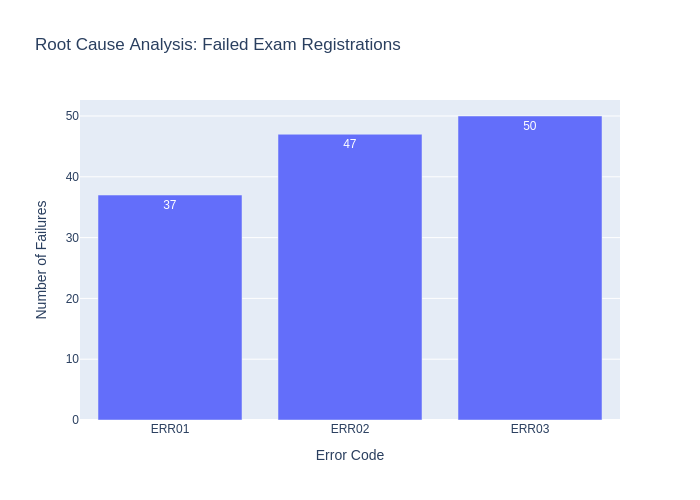

In [6]:
import plotly.express as px
from IPython.display import Image

# Create figure
fig = px.bar(
    error_summary,
    x='error_code',
    y='error_count',
    title='Root Cause Analysis: Failed Exam Registrations',
    labels={'error_code': 'Error Code', 'error_count': 'Number of Failures'},
    text='error_count'
)

# Save plot as static PNG (nbviewer will display it)
fig.write_image("root_cause_barplot.png")

# Display image
Image("root_cause_barplot.png")


## ✅ Summary

In this simulation, we demonstrated:
- How to use SQL to conduct root cause analysis on registration failures
- How AWS-style querying (Athena/Redshift) can be replicated using SQLite
- How to visualize operational problems using interactive charts
- How to structure workflows that resemble cloud-based pipelines (e.g., S3 + Athena)

This notebook is a strong example of how I’ve applied **AWS analytics tools**, **SQL expertise**, and **problem-solving skills**—exactly the kind of experience highlighted in my application to the **College Board’s Exam Config team**.
